In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import warnings
from func import ind, fl, fitData
warnings.filterwarnings("ignore")

Inserting Prepared Data

In [2]:
data = pd.read_csv('/home/ict4bd/Desktop/Project/Data_Output/Data_for_ARIMA.csv',sep=',',decimal=',', low_memory=False)

Define a list with just value and Converting Data from STRING to FLOAT


In [3]:
data = fl(data)
X = data.total_power.values.astype(float)

Defining Training and test size for ARIMA Model

In [4]:
# amount of data in the initial window of training
training_size = 24*365*2
# number of tests to be done for which we repeat the train and test
test_size = 24*365

Ordering P (autocorrelation value) and Q (partial autocorrelation)
with the best values that obtained from grid search

In [5]:
p = 7
q = 7
d = 0
order = (p,d,q)

Create the train and test data (split train and test)

In [6]:
train = X[0:training_size]
test = X[training_size:training_size + test_size]

Main part of Process (grid search)

In [ ]:
predictions = list()
# data for training
history = [x for x in train]
# for all tests
for t in range(0, test_size):
    # new ARIMA model
    try:
        model = ARIMA(history, order=order)
        # fit it
        model_fit = model.fit(method='css', disp=0)
        # forecasted data at t+j
        output = model_fit.forecast()[0][0]
        print(output)
        # get t+1 -> sorting obs
        predictions.append(output)
        # slide over time by putting now+1 into past
        history.append(test[t])
        # drop first sample to use sliding window (to use expanding window, comment the following line)
        histroy = history[1:]
    except:
        print("* ERROR IN TRAINING THE MODEL *")


df_predictions = pd.DataFrame(predictions)
df_predictions.to_csv('/home/ict4bd/Desktop/Project/Data_Output/Arima_Result.csv', index=False)

Because the last piece of code is really heavy in order to process and time, we split it into smaller part
and the result obtained in unic file of CSV as Follow

In [7]:
Arima_result = pd.read_csv('/home/ict4bd/Desktop/Project/Data_Output/Arima_Result.csv',sep=',',decimal=',', low_memory=False)
Arima_result.rename(columns={'0': 'data'}, inplace=True)
Arima_result['data'] = pd.to_numeric(Arima_result['data'], errors='coerce')
Arima_result['data'] = Arima_result['data'].apply(lambda x: round(x, 4))

Creating Dataframe of test data

In [8]:
df_test = pd.DataFrame(test)
df_test.rename(columns={0: 'data'}, inplace=True)

Calculating MSE

In [10]:
mse = mean_squared_error(df_test['data'], Arima_result['data'])
print('The mean Squared Error of Data without relpacing negative data is: ',mse)

The mean Squared Error of Data without relpacing negative data is:  0.6289836220399544


Replacing Negative value with zero

In [10]:
Arima_result[Arima_result < 0] = 0

Calculating MSE with corrected value

In [11]:
mse = mean_squared_error(df_test['data'], Arima_result['data'])
print('The mean Squared Error of Data with relpacing negative data is: ',mse)

The mean Squared Error of Data with relpacing negative data is:  0.5620468955821919


<Figure size 432x288 with 0 Axes>

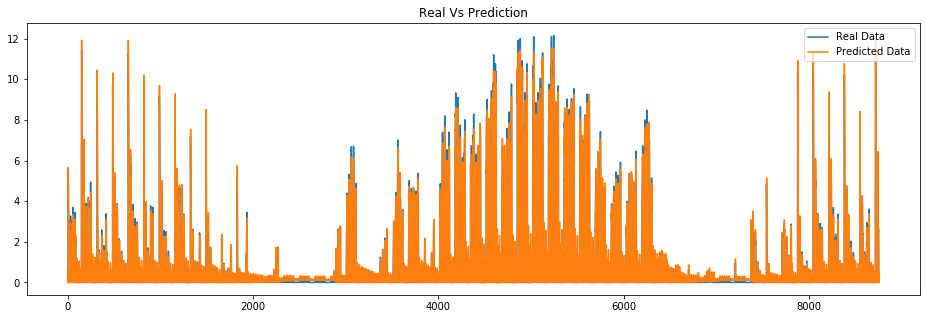

In [12]:
plt.figure()
fig, ax = plt.subplots( 1, 1, figsize=(16,5) )
plt.plot(np.arange(test_size), df_test['data'], label="Real Data")
plt.plot(np.arange(test_size), Arima_result['data'], label="Predicted Data")
plt.title('Real Vs Prediction')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

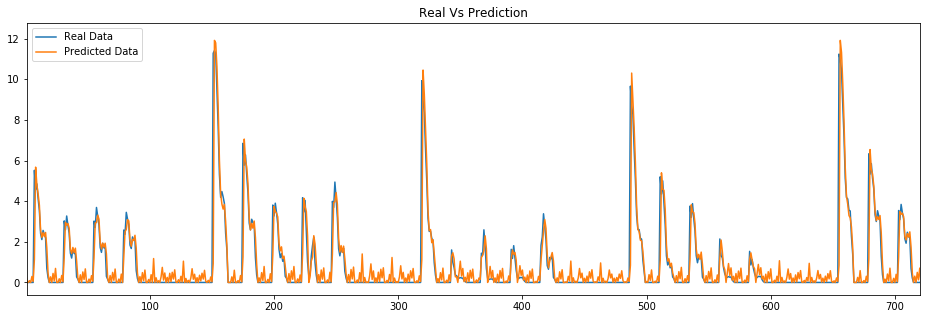

In [13]:
plt.figure()
fig, ax = plt.subplots( 1, 1, figsize=(16,5) )
plt.plot(np.arange(test_size), df_test['data'], label="Real Data")
plt.plot(np.arange(test_size), Arima_result['data'], label="Predicted Data")
plt.title('Real Vs Prediction')
plt.legend()
plt.xlim(1, 720)
plt.show()